In [32]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss, confusion_matrix,ConfusionMatrixDisplay

In [33]:
(X, y) = load_breast_cancer(return_X_y=True)
print(X.shape, y.shape)

(569, 30) (569,)


In [34]:
df = pd.DataFrame(X)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    float64
 1   1       569 non-null    float64
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

In [36]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64

In [37]:
df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
dtype: object

In [38]:
df[30]=y

In [39]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [40]:
df_corr = df.corr().round(2)
print(df_corr)

      0     1     2     3     4     5     6     7     8     9   ...    21  \
0   1.00  0.32  1.00  0.99  0.17  0.51  0.68  0.82  0.15 -0.31  ...  0.30   
1   0.32  1.00  0.33  0.32 -0.02  0.24  0.30  0.29  0.07 -0.08  ...  0.91   
2   1.00  0.33  1.00  0.99  0.21  0.56  0.72  0.85  0.18 -0.26  ...  0.30   
3   0.99  0.32  0.99  1.00  0.18  0.50  0.69  0.82  0.15 -0.28  ...  0.29   
4   0.17 -0.02  0.21  0.18  1.00  0.66  0.52  0.55  0.56  0.58  ...  0.04   
5   0.51  0.24  0.56  0.50  0.66  1.00  0.88  0.83  0.60  0.57  ...  0.25   
6   0.68  0.30  0.72  0.69  0.52  0.88  1.00  0.92  0.50  0.34  ...  0.30   
7   0.82  0.29  0.85  0.82  0.55  0.83  0.92  1.00  0.46  0.17  ...  0.29   
8   0.15  0.07  0.18  0.15  0.56  0.60  0.50  0.46  1.00  0.48  ...  0.09   
9  -0.31 -0.08 -0.26 -0.28  0.58  0.57  0.34  0.17  0.48  1.00  ... -0.05   
10  0.68  0.28  0.69  0.73  0.30  0.50  0.63  0.70  0.30  0.00  ...  0.19   
11 -0.10  0.39 -0.09 -0.07  0.07  0.05  0.08  0.02  0.13  0.16  ...  0.41   

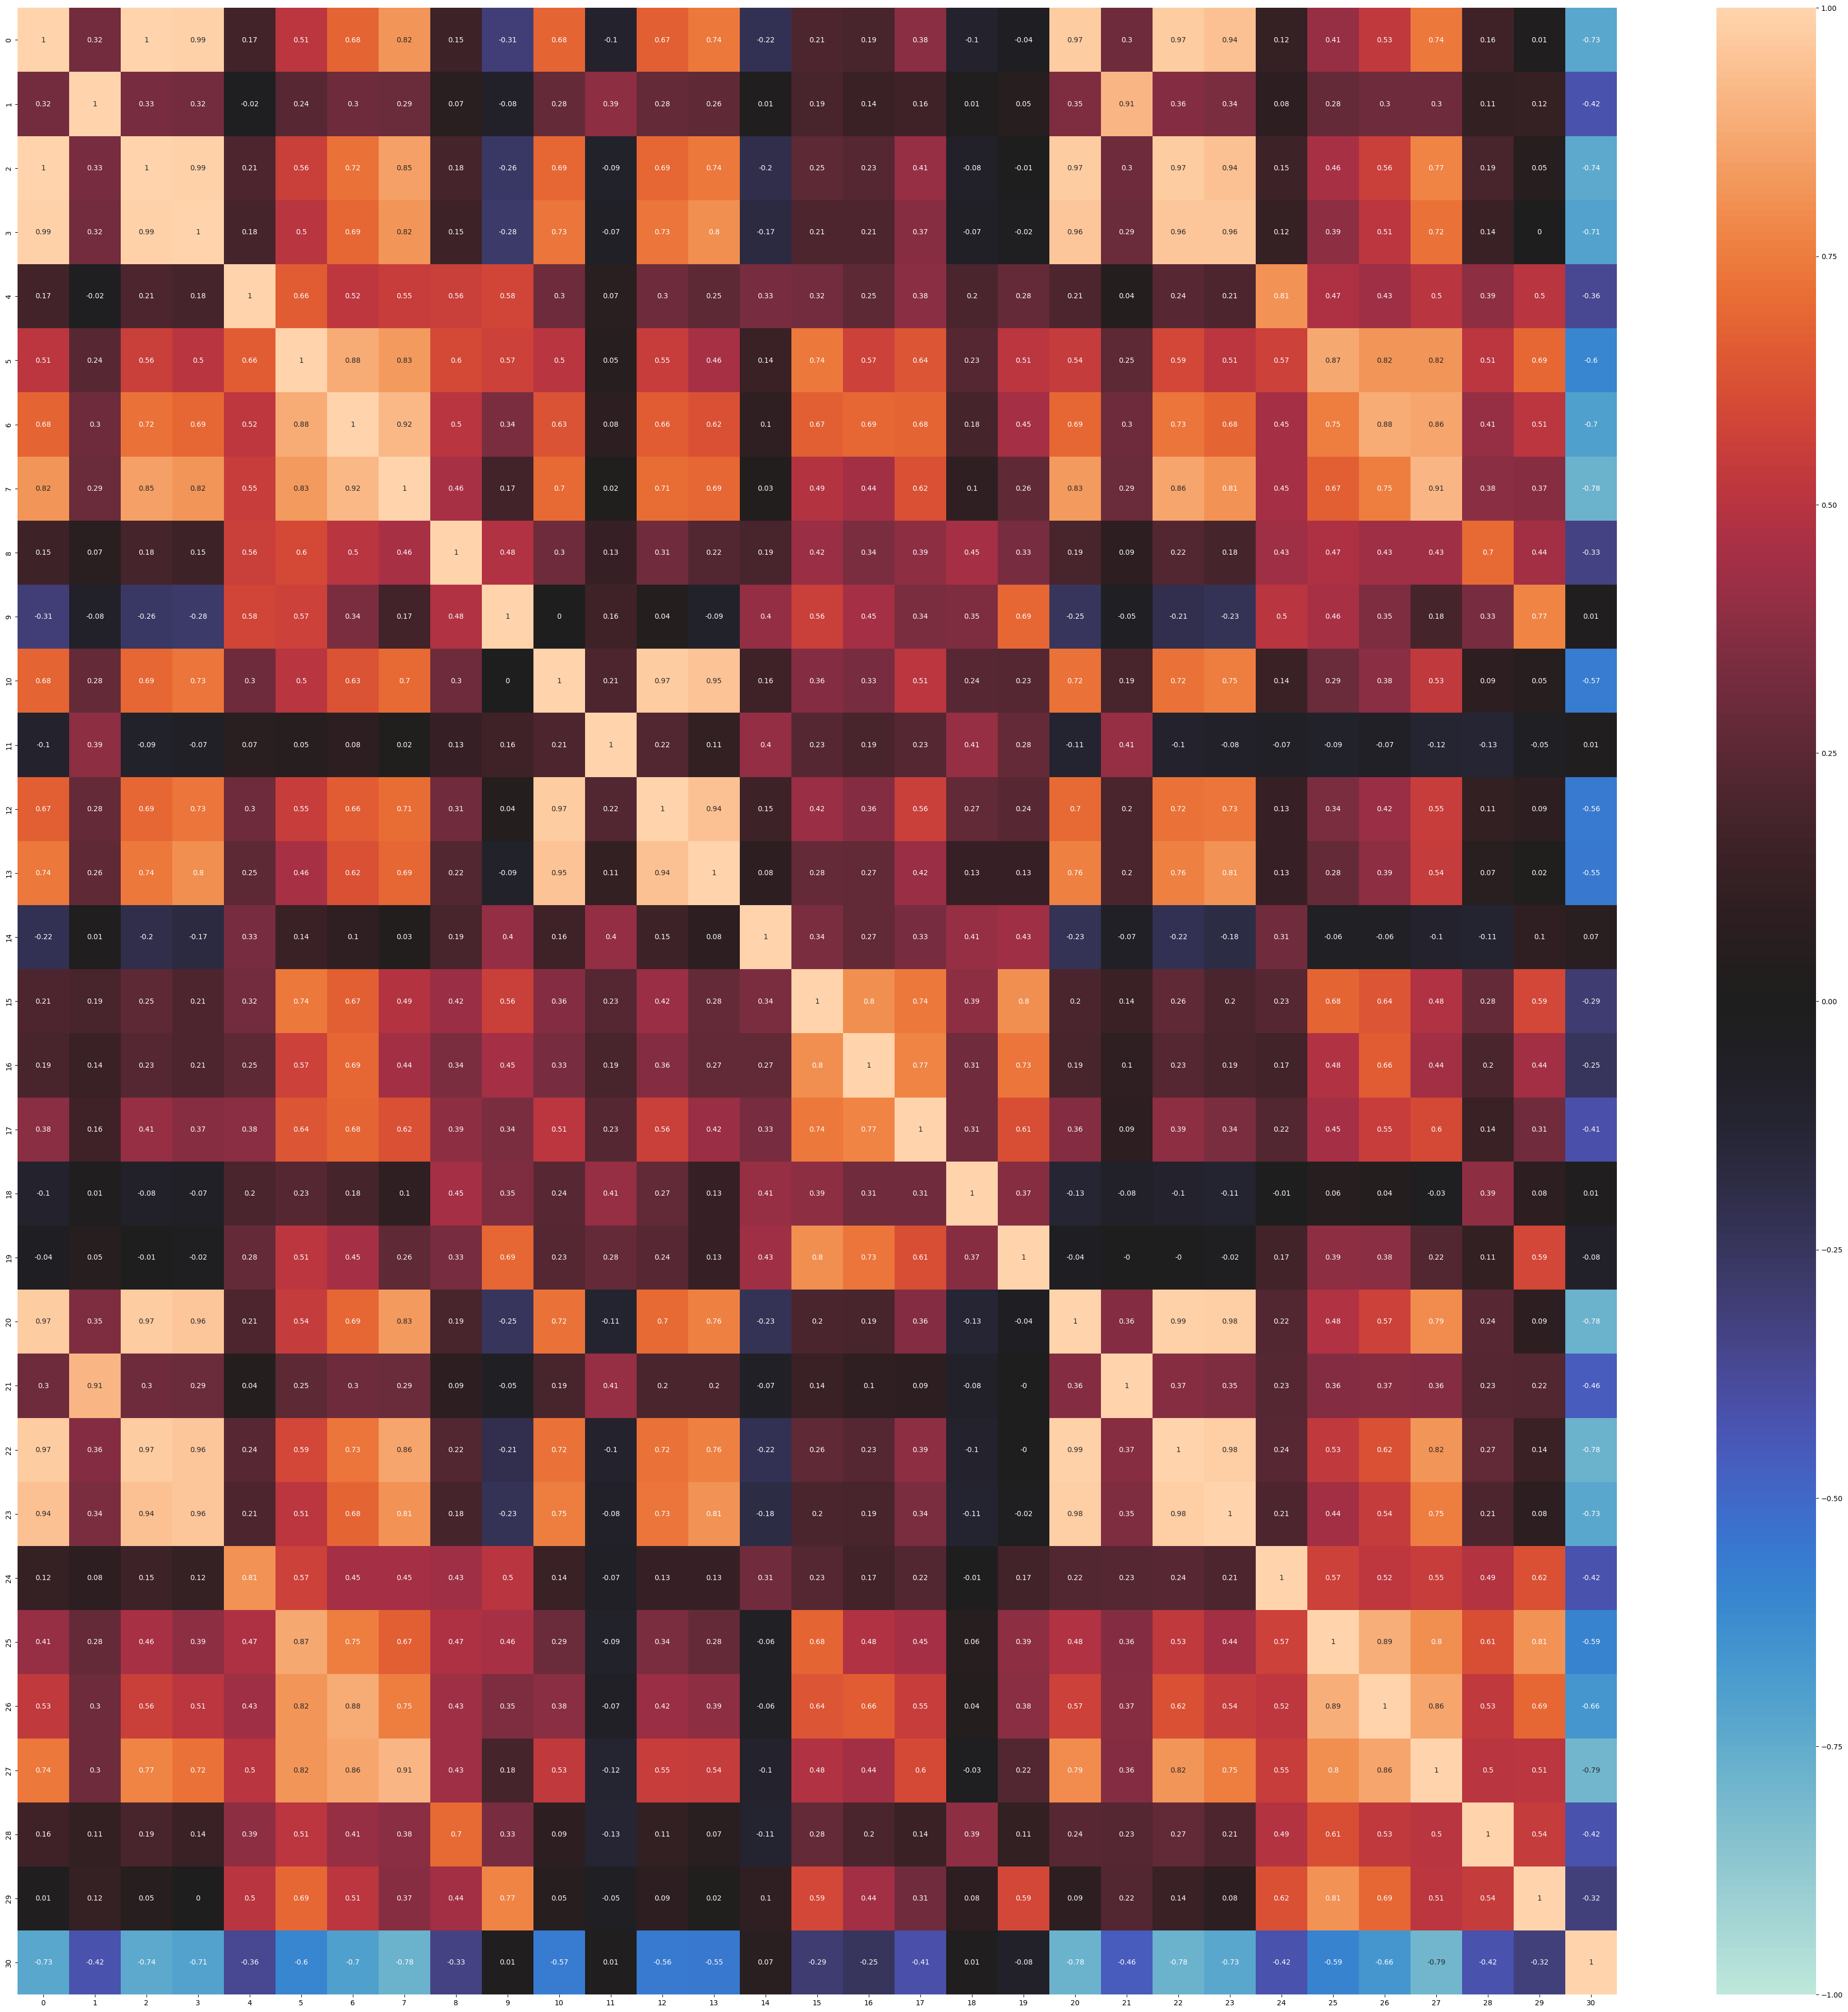

In [41]:
plt.figure(figsize=(50,50))
sns.heatmap(data=df_corr,vmin=-1,vmax=1,center=0,annot=True)
plt.show()

In [42]:
abs(df_corr[30]) >=0.5

0      True
1     False
2      True
3      True
4     False
5      True
6      True
7      True
8     False
9     False
10     True
11    False
12     True
13     True
14    False
15    False
16    False
17    False
18    False
19    False
20     True
21    False
22     True
23     True
24    False
25     True
26     True
27     True
28    False
29    False
30     True
Name: 30, dtype: bool

In [43]:
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

scalar = StandardScaler()
pca= PCA()
poly = PolynomialFeatures(degree=1,include_bias=False)
lr = LogisticRegression()

# delete columns having correalation less than 0.5
X= df.drop(columns=[1,4,8,9,11,14,15,16,17,18,19,21,24,28,29]) 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5,shuffle=True)
X_cv,X_tmp,y_cv,y_tmp = train_test_split(X_test,y_test,test_size=0.2,random_state=5,shuffle=True)

X_train = scalar.fit_transform(X_train)
#X_train = pca.fit_transform(X_train)
X_train = poly.fit_transform(X_train)

X_cv = scalar.transform(X_cv)
#X_cv = pca.transform(X_cv)
X_cv = poly.transform(X_cv)

lr.fit(X_train,y_train)

#print(lr.coef_)
#print(lr.intercept_)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

print(X_cv.shape)
print(y_cv.shape)


(455, 16)
(455,)
(114, 16)
(114,)
(91, 16)
(91,)


score = 1.00
log_loss = 0.00


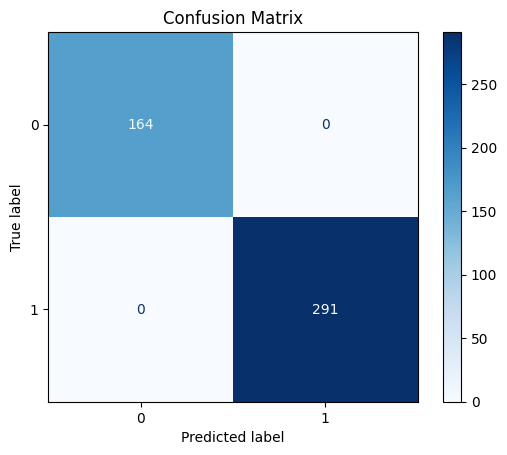

In [53]:
y_train_pred = lr.predict(X_train)
print(f"score = {lr.score(X_train,y_train):.2f}")
print(f"log_loss = {log_loss(y_train,y_train_pred):.2f}")
cm = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap=plt.cm.Blues) # Customize colormap if desired
plt.title("Confusion Matrix")
plt.show()

score = 1.00
log_loss = 0.00


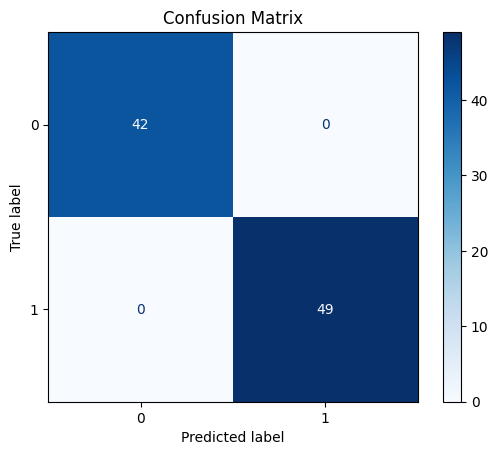

In [54]:
y_cv_pred = lr.predict(X_cv)
print(f"score = {lr.score(X_cv,y_cv):.2f}")
print(f"log_loss = {log_loss(y_cv,y_cv_pred):.2f}")
cm = confusion_matrix(y_cv, y_cv_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap=plt.cm.Blues) # Customize colormap if desired
plt.title("Confusion Matrix")
plt.show()

score = 1.00
log_loss = 0.00


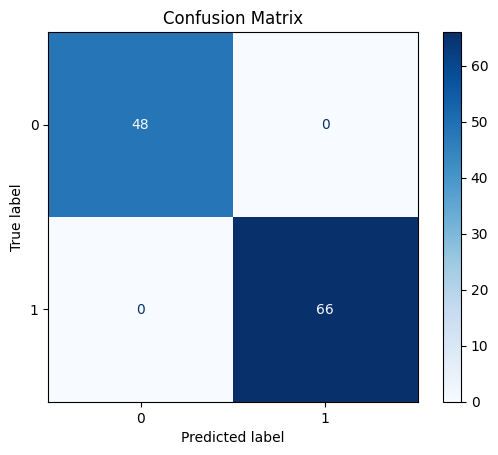

In [55]:
X_test = scalar.transform(X_test)
#X_test = pca.transform(X_test)
X_test = poly.transform(X_test)

y_test_pred = lr.predict(X_test)
print(f"score = {lr.score(X_test,y_test):.2f}")
print(f"log_loss = {log_loss(y_test,y_test_pred):.2f}")
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap=plt.cm.Blues) # Customize colormap if desired
plt.title("Confusion Matrix")
plt.show()